# <div id=A style="color:black;display:fill;background-color:Black;overflow:hidden"><p style="padding:30px;color:white;overflow:hidden;font-size:130%;margin:0;text-align:center;font-family: Georgia; border-radius:5px;">PROJET DE BIG DATA : ANALYSE DES DONNEES DU SECTEUR DE LA FINANCE AVEC PYSPARK</p></div>


# <div  id='I' style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:lightskyblue;overflow:hidden"><b> I. Introduction</b></div>

## <font color="#0d94cd">Contexte</font>


## <font color="#0d94cd">Problématique</font>


## <font color="#0d94cd">Objectifs</font>

# <div  id='I' style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:lightskyblue;overflow:hidden"><b> I. PREPARATION DES DONNEES</b></div>

<a href='#top' style='text-decoration:none; font-family: cursive; color=white;'>Table des matières^</a><br>

## <font  id="1.1" color="#0d94cd">1.1. Chargement des modules</font>

In [1]:
# Importation des modules 
import plotly.express as px
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession


## <font  id = '1.2' color="#0d94cd">1.2. Importation et présentation du jeu de données</font>

### <font id = '1.2.1' color="#0d94cd">1.2.1. Création de la séssion Spark</font>

In [3]:
# Création d'une session Spark
spark = SparkSession.builder \
    .appName("DataAnalysisFince") \
    .master("local[*]") \
    .getOrCreate()
# Création de l'environnement Spark
sc = spark.sparkContext
# Afficher les informations de l'environnement Spark
print("Spark Context Version:", sc.version)
print("Application Name:", sc.appName)

Spark Context Version: 3.5.4
Application Name: DataAnalysisFince


### <font id = '1.2.2' color="#0d94cd">1.2.2. Importation du jeu de données</font>

In [4]:
# Chemin d'accès au fichier CSV sur votre Google Drive
file_path = 'C:/Users/Dell/Desktop/ISE 2/ISE 2 S1/Big data/Projet_big_data/base.csv'
df = spark.read.csv(file_path, header=True, inferSchema=True)

# Afficher les premières lignes
df.show(5)

+----+--------+--------+-----------+-------------+--------------+-----------+--------------+--------------+-------+--------------+
|step|    type|  amount|   nameOrig|oldbalanceOrg|newbalanceOrig|   nameDest|oldbalanceDest|newbalanceDest|isFraud|isFlaggedFraud|
+----+--------+--------+-----------+-------------+--------------+-----------+--------------+--------------+-------+--------------+
|   1| PAYMENT| 9839.64|C1231006815|     170136.0|     160296.36|M1979787155|           0.0|           0.0|      0|             0|
|   1| PAYMENT| 1864.28|C1666544295|      21249.0|      19384.72|M2044282225|           0.0|           0.0|      0|             0|
|   1|TRANSFER|   181.0|C1305486145|        181.0|           0.0| C553264065|           0.0|           0.0|      1|             0|
|   1|CASH_OUT|   181.0| C840083671|        181.0|           0.0|  C38997010|       21182.0|           0.0|      1|             0|
|   1| PAYMENT|11668.14|C2048537720|      41554.0|      29885.86|M1230701703|      

### <font  id = '1.2.3' color="#0d94cd">1.2.3. Présentation du jeu de données</font>

In [48]:
#type 
type(df)

pyspark.sql.dataframe.DataFrame

In [49]:
# Afficher le nombre de lignes et de colonnes
print(f"Nombre de lignes : {df.count()}")
print(f"Nombre de colonnes : {len(df.columns)}")

Nombre de lignes : 6362620
Nombre de colonnes : 11


In [50]:
# Afficher le schéma
df.printSchema()

root
 |-- step: integer (nullable = true)
 |-- type: string (nullable = true)
 |-- amount: double (nullable = true)
 |-- nameOrig: string (nullable = true)
 |-- oldbalanceOrg: double (nullable = true)
 |-- newbalanceOrig: double (nullable = true)
 |-- nameDest: string (nullable = true)
 |-- oldbalanceDest: double (nullable = true)
 |-- newbalanceDest: double (nullable = true)
 |-- isFraud: integer (nullable = true)
 |-- isFlaggedFraud: integer (nullable = true)



**Commentaire :** La base de données pyspark est constituée de 11 variables (colonnes) et de 6362620 observations (lignes). Parmi les 11 variables, 3 sont de type entier (step, isFraud, isFlaggedFraud), 3 de type chaîne (type, name0rig, namesDest) et 5 de type « double » (amount, oldbalanceOrg, newbalanceOrig, oldbalanceDest et newbalanceDest). 

Ainsi, le jeu de données est constitué de 5 variables quantitatives (amount, oldbalanceOrg, newbalanceOrig, oldbalanceDest et newbalanceDest) et 6 variables qualitatives (step, isFraud, isFlaggedFraud, type, name0rig, namesDest). 


### <font  id = '1.2.4' color="#0d94cd">1.2.4. Dictionnaire de données</font>

* `step` - représente une unité de temps dans le monde réel. Dans ce cas, 1 pas correspond à 1 heure de temps. Le nombre total d'étapes est de 744 (simulation de 30 jours).
* `type` - ENTRÉE, SORTIE, DÉBIT, PAIEMENT et TRANSFERT.
* `montant` -montant de la transaction en monnaie locale.
* `nameOrig` - client à l'origine de la transaction
* `oldbalanceOrg` - solde initial avant la transaction
* `newbalanceOrig` - nouveau solde après la transaction.
* `nameDest` - client qui est le destinataire de la transaction
* `oldbalanceDest` - solde initial du destinataire avant la transaction. Notez qu'il n'y a pas d'informations pour les clients qui commencent par M(Merchants).
* `newbalanceDest` - destinataire du nouveau solde après la transaction. Notez qu'il n'y a pas d'information pour 
* les clients qui commencent par M (Merchants).
* `isFraud` - Il s'agit des transactions effectuées par les agents frauduleux dans le cadre de la simulation. Dans cet ensemble de données spécifique, le comportement frauduleux des agents vise à faire du profit en prenant le contrôle des comptes des clients et en essayant de vider les fonds en les transférant sur un autre compte, puis en les retirant du système.


### <font  id = '1.2.5' color="#0d94cd">1.2.5. Traitement des données </font>

### <font color="#0d94cd"> Doublons </font>

In [15]:
import pyspark.sql.functions as F
df.groupBy(df.columns)\
.count()\
.where(F.col('count') > 1)\
.show()

+----+----+------+--------+-------------+--------------+--------+--------------+--------------+-------+--------------+-----+
|step|type|amount|nameOrig|oldbalanceOrg|newbalanceOrig|nameDest|oldbalanceDest|newbalanceDest|isFraud|isFlaggedFraud|count|
+----+----+------+--------+-------------+--------------+--------+--------------+--------------+-------+--------------+-----+
+----+----+------+--------+-------------+--------------+--------+--------------+--------------+-------+--------------+-----+



> **Commentaire :** Aucune doublon


### <font color="#0d94cd"> Valeurs manquantes </font>

In [16]:
from pyspark.sql.functions import col, sum as _sum
# Compter les valeurs nulles par colonne
missing_values_count = df.select([_sum(col(c).isNull().cast("int")).alias(c) for c in df.columns])

missing_values_count.show()

+----+----+------+--------+-------------+--------------+--------+--------------+--------------+-------+--------------+
|step|type|amount|nameOrig|oldbalanceOrg|newbalanceOrig|nameDest|oldbalanceDest|newbalanceDest|isFraud|isFlaggedFraud|
+----+----+------+--------+-------------+--------------+--------+--------------+--------------+-------+--------------+
|   0|   0|     0|       0|            0|             0|       0|             0|             0|      0|             0|
+----+----+------+--------+-------------+--------------+--------+--------------+--------------+-------+--------------+



> **Commentaire :** Aucune valeur manquante 

# <div  id='II' style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:lightskyblue;overflow:hidden"><b> II. DESCRIPTION DES VARIABLES </b></div>

<a href='#top' style='text-decoration:none; font-family: cursive; color=white;'>Table des matières^</a><br>

## <font id = '2.1' color="#0d94cd">2.1. Description des variables qualitatives </font>

### <font id = '2.1.1' color="#0d94cd">2.1.1. Types de transactions </font>


In [17]:
total_count = df.count()
frequencies = df.groupBy("type").count().withColumn("fréquence", 100*F.col("count") / total_count)

frequencies.show()

+--------+-------+------------------+
|    type|  count|         fréquence|
+--------+-------+------------------+
|TRANSFER| 532909| 8.375621992198182|
| CASH_IN|1399284|21.992261049693365|
|CASH_OUT|2237500| 35.16633085112736|
| PAYMENT|2151495| 33.81460781879163|
|   DEBIT|  41432|0.6511782881894566|
+--------+-------+------------------+



In [18]:
pandas_df = df.groupBy("type").count().toPandas()

fig = px.bar(
       pandas_df,
       x="type",  # X-axis: Transaction types
       y="count",  # Y-axis: Transaction counts
       title="Distribution of Transaction Types",  # Chart title
       labels={"type": "Transaction Type", "count": "Count"},  # Axis labels
       color="type",  # Color bars by transaction type
       color_discrete_sequence=px.colors.qualitative.Pastel,  # Use a stylish color palette
   )

   # Customize the chart appearance
fig.update_layout(
       xaxis_title="Transaction Type",  # X-axis title
       yaxis_title="Count",  # Y-axis title
       font=dict(family="Arial", size=12, color="black"),  # Font settings
       plot_bgcolor="white",  # Background color
       paper_bgcolor="white",  # Paper color
       bargap=0.1,  # Spacing between bars
   )

fig.show()

>**Indicateur 1 :** Transaction la plus courante 
Il s'agit de la transaction "CASH_OUT" qui représente 35.17% de l'ensemble.

>**Indicateur 2 :** Transaction la moins courante 
Il s'agit de la transaction "DEBIT" qui représente 0.65% de l'ensemble.

>**Commentaire** : Ainsi, sur 3 transactions, en moyenne une est un retrait, une est un payement et l'autre est soit un dépôt, soit un tranfert, soit un débit.   

 ### <font id = '2.1.2' color="#0d94cd">2.1.2. Survenue de fraudes </font>

In [19]:
total_count = df.count()
frequencies1 = df.groupBy("isFraud").count().withColumn("fréquence", 100*F.col("count") / total_count)

frequencies1.show()


+-------+-------+-------------------+
|isFraud|  count|          fréquence|
+-------+-------+-------------------+
|      1|   8213|0.12908204481801522|
|      0|6354407|  99.87091795518198|
+-------+-------+-------------------+



In [20]:
pandas_df = df.groupBy("isFraud").count().toPandas()
fig = px.pie(
       pandas_df,
       values='count',
       names='isFraud',
       title='Distribution of Fraudulent Transactions',
       color_discrete_sequence=px.colors.qualitative.Pastel,  # Customize colors
       hole=0.3  # Add a hole in the center for a donut chart effect
   )

fig.update_traces(
       textposition='inside',  # Show labels inside the slices
       textinfo='percent+label',  # Display percentage and label
       marker=dict(line=dict(color='#000000', width=2))  # Add black borders to slices
   )

fig.update_layout(
       font=dict(family="Arial", size=12, color="black"),  # Customize font
       legend_title="Transaction Type",  # Customize legend title
       legend=dict(x=0.8, y=0.9)  # Position the legend
   )

   # Display the chart
fig.show()

>**Indicateur 3 :** Nombre et proportion de fraudes 
Sur la période étudiée il y a eu 8213 fraudes soit 0.13% du nombre total de transactions.

>**Commentaire** : Ainsi, il n'existe qu'une proportion apparemment infime de fraudes (0.13%), mais le nombre de transactions étant élevé cela revient à **8213** fraudes ce qui est assez important à l'échelle d'une institution financière comme une banque.

 ### <font id = '2.1.3' color="#0d94cd">2.1.3. Transactions soupçonnées de fraudes </font>
 #

In [21]:
total_count = df.count()
frequencies1 = df.groupBy("isFlaggedFraud").count().withColumn("fréquence", 100*F.col("count") / total_count)
frequencies1.show()

+--------------+-------+--------------------+
|isFlaggedFraud|  count|           fréquence|
+--------------+-------+--------------------+
|             0|6362604|   99.99974853126542|
|             1|     16|2.514687345778940...|
+--------------+-------+--------------------+



>**Indicateur 4** : Nombre de transactions soupçonnées frauduleuses 
Il vaut 16.

>**Commentaire** : Seulement 16 transactions sont soupçonnées frauduleuses parmi les 6362604, ce qui représente une faible proportion de l'ensemble des transactions. 

In [22]:
df.cache()

DataFrame[step: int, type: string, amount: double, nameOrig: string, oldbalanceOrg: double, newbalanceOrig: double, nameDest: string, oldbalanceDest: double, newbalanceDest: double, isFraud: int, isFlaggedFraud: int]

## <font id = '2.2' color="#0d94cd">2.2. Description des variables quantitatives </font>

### <font id = '2.2' color="#0d94cd"> 2.2.1. Tableau récapitulatif des statistiques descriptives </font>

In [23]:
# Obtenir les statistiques descriptives
description = df.select('amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest','newbalanceDest').describe()

# Afficher les statistiques descriptives 
description.show()

+-------+------------------+-----------------+-----------------+------------------+------------------+
|summary|            amount|    oldbalanceOrg|   newbalanceOrig|    oldbalanceDest|    newbalanceDest|
+-------+------------------+-----------------+-----------------+------------------+------------------+
|  count|           6362620|          6362620|          6362620|           6362620|           6362620|
|   mean|179861.90354913412|833883.1040744719|855113.6685785714|1100701.6665196654|1224996.3982019408|
| stddev| 603858.2314629498|2888242.673037545|2924048.502954253|3399180.1129944855|3674128.9421195714|
|    min|               0.0|              0.0|              0.0|               0.0|               0.0|
|    max|     9.244551664E7|    5.958504037E7|    4.958504037E7|    3.5601588935E8|    3.5617927892E8|
+-------+------------------+-----------------+-----------------+------------------+------------------+



>**Indicateur 5** : Montant moyen des transactions 

>**Indicateur 6** : Montant minimal des transactions 

>**Indicateur 7** : Montant maximal des transactions 

>**Indicateur 8** : Soldes moyens des clients à l'origine de transactions avant et après les transactions 

>**Indicateur 9** : Solde moyen des clients destinataires de transactions avant et après les transactions

In [24]:
# Calcul des sommes des variables 
from pyspark.sql.functions import sum

sums = df.select(
    sum('amount').alias('total_amount'),
    sum('oldbalanceOrg').alias('total_oldbalanceOrg'),
    sum('newbalanceOrig').alias('total_newbalanceOrig'),
    sum('oldbalanceDest').alias('total_oldbalanceDest'),
    sum('newbalanceDest').alias('total_newbalanceDest'),
)
sums.show()

+--------------------+--------------------+--------------------+--------------------+--------------------+
|        total_amount| total_oldbalanceOrg|total_newbalanceOrig|total_oldbalanceDest|total_newbalanceDest|
+--------------------+--------------------+--------------------+--------------------+--------------------+
|1.144392944759791...|5.305681315646316E12| 5.44076332997139E12|7.003346437431354E12|7.794186583127633E12|
+--------------------+--------------------+--------------------+--------------------+--------------------+



### <font id = '2.2.2' color="#0d94cd"> 2.2.2. Sommes et totaux des variables quantitatives </font>

>**Indicateur 10** : Montant total des transactions 

>**Indicateur 11** : Somme des soldes des clients à l'origine de transactions avant et après les transactions 

>**Indicateur 11** : Somme des soldes des clients destinataires de transactions avant et après les transactions 

### <font id = '2.2.3' color="#0d94cd"> 2.2.3. Sommes et totaux des variables quantitatives </font>

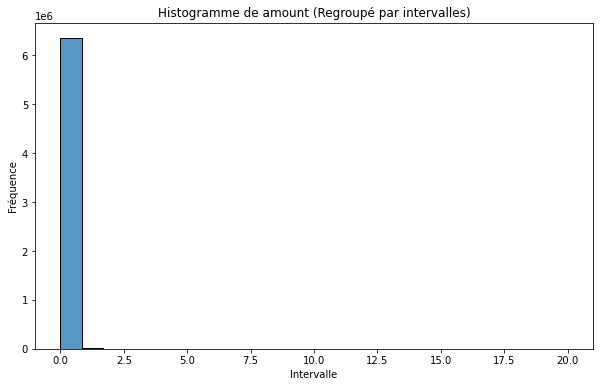

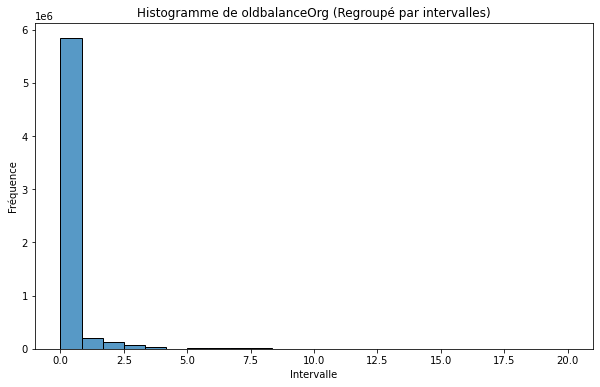

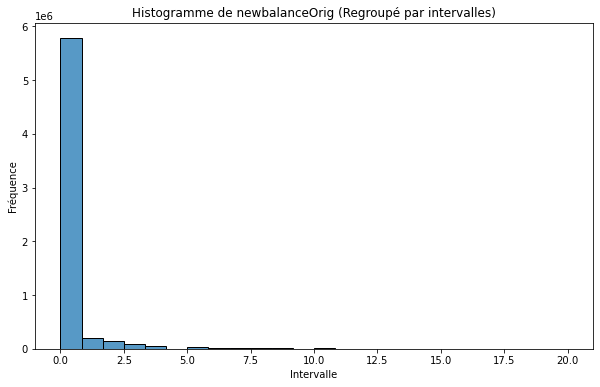

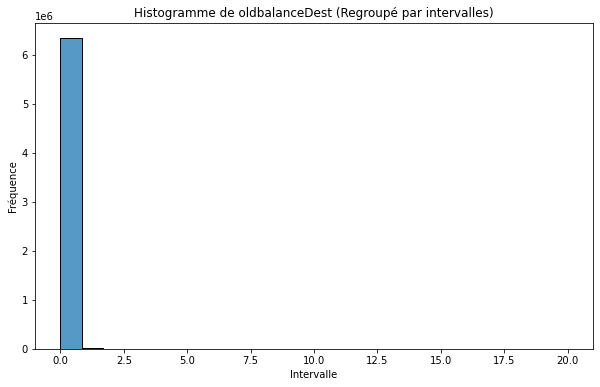

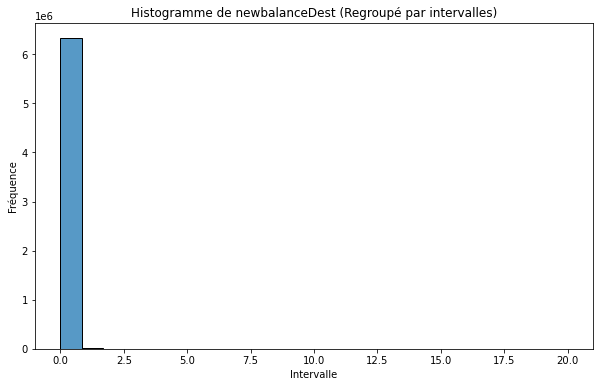

In [45]:
from pyspark.sql.functions import floor, col
# Liste des colonnes à traiter
columns_to_bin = ["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"]

# Nombre d'intervalles (bins)
num_bins = 20  # Ajustez ce nombre selon vos besoins

for col_name in columns_to_bin:
    # 1. Déterminer les valeurs min et max pour chaque colonne
    min_val = df.selectExpr(f"min({col_name})").first()[0]
    max_val = df.selectExpr(f"max({col_name})").first()[0]

    # 2. Calculer la largeur de chaque intervalle
    bin_width = (max_val - min_val) / num_bins

    # 3. Créer une nouvelle colonne avec les valeurs regroupées par intervalles (binning)
    binned_col_name = f"{col_name}_binned"
    df = df.withColumn(binned_col_name, floor((col(col_name) - min_val) / bin_width))

    # 4. Convertir la colonne regroupée en intervalles en DataFrame Pandas pour la visualisation
    pandas_df = df.select(binned_col_name).toPandas()

    # 5. Tracer l'histogramme à l'aide de Seaborn
    plt.figure(figsize=(10, 6))  # Ajuster la taille de la figure
    sns.histplot(pandas_df[binned_col_name], kde=False) # kde=False pour un histogramme simple
    plt.title(f"Histogramme de {col_name} (Regroupé par intervalles)")
    plt.xlabel("Intervalle")
    plt.ylabel("Fréquence")
    plt.show()


# <div  id='III' style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:lightskyblue;overflow:hidden"><b> III. ANALYSE DES PRINCIPAUX INDICATEURS </b></div>

<a href='#top' style='text-decoration:none; font-family: cursive; color=white;'>Table des matières^</a><br>

## <font id = '3.1' color="#0d94cd">3.1. Analyse des clients  </font>

### <font color="#0d94cd">Indicateur : Nombre unique de clients à l'origine des transactions </font>

In [26]:
nombre_clients_uniques = df.select("nameOrig").distinct().count()
print(f"Nombre unique de clients à l'origine des transactions: {nombre_clients_uniques}")

Nombre unique de clients à l'origine des transactions: 6353307


### <font color="#0d94cd">Indicateur : Nombre unique de clients destinataires des transactions </font>

In [27]:
nombre_clients_uniques = df.select("nameDest").distinct().count()
print(f"Nombre unique de clients à l'origine des transactions: {nombre_clients_uniques}")

Nombre unique de clients à l'origine des transactions: 2722362


### <font color="#0d94cd">Indicateur : Top 10 des clients qui sont à l'origine des plus grands nombres de transactions </font>

In [ ]:
from pyspark.sql.functions import count

# Compter le nombre de transactions par client à l'origine
origin_counts = df.groupBy("nameOrig").agg(count("*").alias("transaction_count_orig"))

# Obtenir le top 10 des clients à l'origine des transactions
top_10_orig = origin_counts.orderBy("transaction_count_orig", ascending=False).limit(10)

# Afficher les résultats
print("Top 10 Clients à l'Origine du plus grand nombre de Transactions:")
top_10_orig.show()

Top 10 Clients à l'Origine des Transactions:
+-----------+----------------------+
|   nameOrig|transaction_count_orig|
+-----------+----------------------+
|C1065307291|                     3|
|C1462946854|                     3|
|C1530544995|                     3|
|C1677795071|                     3|
|C1784010646|                     3|
| C400299098|                     3|
|C1902386530|                     3|
| C545315117|                     3|
|C1976208114|                     3|
|C1832548028|                     3|
+-----------+----------------------+



### <font color="#0d94cd">Indicateur : Top 10 des clients qui sont à l'origine des plus gros montants de transactions </font>

In [ ]:
from pyspark.sql.functions import sum

# Calculer le montant total des transactions par client à l'origine
origin_amounts = df.groupBy("nameOrig").agg(sum("amount").alias("total_amount_orig"))

# Obtenir le top 10 des clients à l'origine des transactions
top_10_orig = origin_amounts.orderBy("total_amount_orig", ascending=False).limit(10)

# Afficher les résultats
print("Top 10 Clients à l'Origine des plus gros Montants de Transactions:")
top_10_orig.show()



Top 10 Clients à l'Origine des Montants de Transactions:
+-----------+-----------------+
|   nameOrig|total_amount_orig|
+-----------+-----------------+
|C1715283297|    9.244551664E7|
|C2127282686|    7.382349036E7|
|C2044643633|    7.117248042E7|
|C1425667947|     6.98867313E7|
|C1584456031|    6.933731627E7|
| C811810230|    6.750076129E7|
| C420748282|    6.676127221E7|
|C1139847449|    6.423444819E7|
| C300140823|    6.384799258E7|
| C372535854|    6.329483963E7|
+-----------+-----------------+



### <font color="#0d94cd">Indicateur : Top 10 des clients qui sont destinataires des plus grands nombres de transactions </font>

In [34]:
# Compter le nombre de transactions par client destinataire
dest_counts = df.groupBy("nameDest").agg(count("*").alias("transaction_count_dest"))

# Obtenir le top 10 des clients destinataires des transactions
top_10_dest = dest_counts.orderBy("transaction_count_dest", ascending=False).limit(10)

print("Top 10 Clients Destinataires des Transactions:")
top_10_dest.show()


Top 10 Clients Destinataires des Transactions:
+-----------+----------------------+
|   nameDest|transaction_count_dest|
+-----------+----------------------+
|C1286084959|                   113|
| C985934102|                   109|
| C665576141|                   105|
|C2083562754|                   102|
| C248609774|                   101|
|C1590550415|                   101|
| C451111351|                    99|
|C1789550256|                    99|
|C1360767589|                    98|
|C1023714065|                    97|
+-----------+----------------------+



### <font color="#0d94cd">Indicateur : Top 10 des clients qui sont destinataires des plus gros montants de transactions </font>

In [37]:
# Calculer le montant total des transactions par client destinataire
dest_amounts = df.groupBy("nameDest").agg(sum("amount").alias("total_amount_dest"))

# Obtenir le top 10 des clients destinataires des transactions
top_10_dest = dest_amounts.orderBy("total_amount_dest", ascending=False).limit(10)

# Afficher les résultats
print("Top 10 Clients Destinataires des Montants de Transactions:")
top_10_dest.show()

Top 10 Clients Destinataires des Montants de Transactions:
+-----------+--------------------+
|   nameDest|   total_amount_dest|
+-----------+--------------------+
| C439737079| 3.574408314400001E8|
| C707403537|2.9937441841999996E8|
| C167875008|       2.747364328E8|
|  C20253152|      2.7011618869E8|
| C172409641|      2.5531017425E8|
| C268913927|2.5348458809999993E8|
| C936857833|2.2778001201999998E8|
|  C65111466|      2.2744384585E8|
| C744189981|      2.2517386173E8|
|C1406193485|      2.2477896183E8|
+-----------+--------------------+



### <font color="#0d94cd">Indicateur : Liste des clients qui sont à l'origine de transferts massifs et Statut de Signalement de Fraude</font>

In [55]:
# Filtrer les transactions de type TRANSFERT avec un montant supérieur à 200 000
massive_transfers = df.filter((col("type") == "TRANSFER") & (col("amount") > 200000))

# Sélectionner les colonnes pertinentes
selected_columns = massive_transfers.select("step", "nameOrig", "amount", "isFlaggedFraud", "isFraud")

# Afficher les résultats
print("Clients à l'origine de Transferts Massifs ( > 200 000) et Statut de Signalement de Fraude:")
selected_columns.show()

# Compter le nombre de transferts massifs qui ont été signalés comme frauduleux
flagged_fraud_count = massive_transfers.filter(col("isFlaggedFraud") == 1).count()

# Compter le nombre de transferts massifs qui n'ont pas été signalés comme frauduleux
flagged_fraud_count1 = massive_transfers.filter(col("isFlaggedFraud") == 0).count()  

print(f"\nNombre de transferts massifs signalés comme frauduleux : {flagged_fraud_count}")
print(f"\nNombre de transferts massifs non signalés comme frauduleux : {flagged_fraud_count1}")

Clients à l'origine de Transferts Massifs ( > 200 000) et Statut de Signalement de Fraude:
+----+-----------+----------+--------------+-------+
|step|   nameOrig|    amount|isFlaggedFraud|isFraud|
+----+-----------+----------+--------------+-------+
|   1|C1670993182|  215310.3|             0|      0|
|   1|C1984094095| 311685.89|             0|      0|
|   1| C873175411| 224606.64|             0|      0|
|   1|C1449772539| 379856.23|             0|      0|
|   1| C926859124|1505626.01|             0|      0|
|   1|C1603696865| 554026.99|             0|      0|
|   1| C412788346| 761507.39|             0|      0|
|   1|C1520267010|1429051.47|             0|      0|
|   1| C908084672| 358831.92|             0|      0|
|   1| C288306765|  367768.4|             0|      0|
|   1|C1556867940| 209711.11|             0|      0|
|   1|C1839168128| 583848.46|             0|      0|
|   1|C1495608502|1724887.05|             0|      0|
|   1| C835773569| 710544.77|             0|      0|
|   1| C

### <font color="#0d94cd">Indicateur : Liste des clients qui sont destinataires de transferts massifs et Statut de Signalement de Fraude</font>

In [54]:
# Filtrer les transactions de type TRANSFERT avec un montant supérieur à 200 000
massive_transfers = df.filter((col("type") == "TRANSFER") & (col("amount") > 200000))

# Sélectionner les colonnes pertinentes
selected_columns = massive_transfers.select("step", "nameDest", "amount", "isFlaggedFraud", "isFraud")

# Afficher les résultats
print("Clients destinataires de Transferts Massifs ( > 200 000) et Statut de Signalement de Fraude:")
selected_columns.show()

# Compter le nombre de transferts massifs qui ont été signalés comme frauduleux
flagged_fraud_count = massive_transfers.filter(col("isFlaggedFraud") == 1).count()

# Compter le nombre de transferts massifs qui n'ont pas été signalés comme frauduleux
flagged_fraud_count1 = massive_transfers.filter(col("isFlaggedFraud") == 0).count()  

print(f"\nNombre de transferts massifs signalés comme frauduleux : {flagged_fraud_count}")
print(f"\nNombre de transferts massifs non signalés comme frauduleux : {flagged_fraud_count1}")

Clients destinataires de Transferts Massifs ( > 200 000) et Statut de Signalement de Fraude:
+----+-----------+----------+--------------+-------+
|step|   nameDest|    amount|isFlaggedFraud|isFraud|
+----+-----------+----------+--------------+-------+
|   1|C1100439041|  215310.3|             0|      0|
|   1| C932583850| 311685.89|             0|      0|
|   1| C766572210| 224606.64|             0|      0|
|   1|C1590550415| 379856.23|             0|      0|
|   1| C665576141|1505626.01|             0|      0|
|   1| C766572210| 554026.99|             0|      0|
|   1|C1590550415| 761507.39|             0|      0|
|   1|C1590550415|1429051.47|             0|      0|
|   1| C392292416| 358831.92|             0|      0|
|   1|C1359044626|  367768.4|             0|      0|
|   1|C1509514333| 209711.11|             0|      0|
|   1|C1286084959| 583848.46|             0|      0|
|   1|C1590550415|1724887.05|             0|      0|
|   1|C1359044626| 710544.77|             0|      0|
|   1|

### <font color="#0d94cd">Indicateur : Liste des et nombre des clients à l'origine de transactions qui sont des "Merchants"</font>

In [65]:
# Liste des transactions dont l'origine est un Merchant (nameOrig commence par 'M')
merchant_transactions = df.filter(col("nameOrig").startswith("M"))

# SSelectionner les différents Merchant
merchant_summary = merchant_transactions.groupBy("nameOrig").agg(count("*").alias("transaction_count"))

# Afficher les résultats
print("Liste des clients à l'origine de transactions qui sont des 'Merchants':")
merchant_summary.show()

Liste des clients à l'origine de transactions qui sont des 'Merchants':
+--------+-----------------+
|nameOrig|transaction_count|
+--------+-----------------+
+--------+-----------------+



### <font color="#0d94cd">Indicateur : Liste des et nombre des clients destinataires de transactions qui sont des "Merchants"</font>

In [71]:
# Filter for transactions where nameDest starts with 'M' indicating merchants
merchant_recipients = df.filter(col("nameDest").startswith("M"))

# Count unique merchant recipients and their occurrences
merchant_counts = merchant_recipients.groupBy("nameDest").count()

# Display results
print("Liste des clients destinataires de transactions qui sont des 'Merchants':")
merchant_counts.show()
print("Nombre de Merchants : ",merchant_counts.select("NameDest").distinct().count()) 


Liste des clients destinataires de transactions qui sont des 'Merchants':
+-----------+-----+
|   nameDest|count|
+-----------+-----+
|M1437988306|    1|
|  M73698537|    1|
|M2024945312|    1|
| M949314262|    1|
|M2054997292|    1|
| M279963418|    1|
|M1456464145|    1|
| M650797503|    1|
|M2135563436|    1|
| M401355610|    1|
| M201036751|    1|
| M981865495|    1|
| M954976358|    1|
|M1908321704|    1|
| M884858691|    1|
|M1042853700|    1|
| M902894836|    1|
|M2072818307|    1|
|M1858702540|    1|
|M1388117264|    1|
+-----------+-----+
only showing top 20 rows

Nombre de Merchants :  2150401


## <font id = '3.2' color="#0d94cd">3.2. Analyse temporelle des transactions  </font>

### <font color="#0d94cd">Indicateur : Nombre et montant total des transactions par heure</font>

In [5]:
from pyspark.sql.functions import col, sum, count
# Calculer le nombre total de transactions et le montant total par heure
hourly_summary = df.groupBy("step") \
                   .agg(count("*").alias("total_transactions"), 
                        sum("amount").alias("total_amount")) \
                   .orderBy("step")

# Afficher les résultats
print("Nombre total et montant des transactions par heure:")
hourly_summary.show()

Nombre total et montant des transactions par heure:
+----+------------------+--------------------+
|step|total_transactions|        total_amount|
+----+------------------+--------------------+
|   1|              2708| 2.854291811500002E8|
|   2|              1014| 8.592160402000001E7|
|   3|               552|       4.329388442E7|
|   4|               565|  7.29100285699998E7|
|   5|               665|4.5548089749999985E7|
|   6|              1660| 1.643105512199997E8|
|   7|              6837| 8.329308142399985E8|
|   8|             21097| 3.439602407349995E9|
|   9|             37628| 7.008379239430003E9|
|  10|             35991| 7.124214893710039E9|
|  11|             37241| 7.015066478010027E9|
|  12|             36153| 6.754284804750042E9|
|  13|             37515| 6.847540999970063E9|
|  14|             41485| 6.874186933619984E9|
|  15|             44609| 7.183723206529984E9|
|  16|             42471|6.9600846911499815E9|
|  17|             43361| 7.116325732270042E9|
|  18|  

In [6]:
# Convert to Pandas DataFrame for visualization
hourly_summary_pd = hourly_summary.toPandas()

# Create a bar chart for total transactions
fig_transactions = px.bar(hourly_summary_pd, x='step', y='total_transactions',
                          title='Total Transactions per Hour',
                          labels={'step': 'Hour', 'total_transactions': 'Total Transactions'})

# Create a bar chart for total amount
fig_amounts = px.bar(hourly_summary_pd, x='step', y='total_amount',
                     title='Total Amount per Hour',
                     labels={'step': 'Hour', 'total_amount': 'Total Amount'})

# Show the plots
fig_transactions.show()
fig_amounts.show()

### <font color="#0d94cd">Indicateur : Top 10 des heures comptant le plus grand nombre de transactions </font>

In [7]:
# Regrouper par 'step' and compter les transactions
hourly_transactions = df.groupBy("step").agg(count("*").alias("transaction_count"))

# Trouver les 10 heures avec le plus grand nombre de transactions
top_10_hours = hourly_transactions.orderBy("transaction_count", ascending=False).limit(10)

# Afficher les résultats
print("Top 10 des heures comptant le plus grand nombre de transactions:")
top_10_hours.show()

Top 10 des heures comptant le plus grand nombre de transactions:
+----+-----------------+
|step|transaction_count|
+----+-----------------+
|  19|            51352|
|  18|            49579|
| 187|            49083|
| 235|            47491|
| 307|            46968|
| 163|            46352|
| 139|            46054|
| 403|            45155|
|  43|            45060|
| 355|            44787|
+----+-----------------+



In [ ]:

# Convertir le DataFrame Spark en un Pandas DataFrame pour Plotly
pandas_df = top_10_hours.toPandas()

# Créer le graphique à barres
fig = go.Figure(data=[go.Bar(
    x=pandas_df["step"],
    y=pandas_df["transaction_count"],
    marker_color='rgb(158,202,225)',
    marker_line_color='rgb(8,48,107)',
    marker_line_width=1.5,
    opacity=0.6
)])

# Personnaliser le graphique
fig.update_layout(
    title='Top 10 des heures avec le plus grand nombre de transactions',
    xaxis_title='Heure (step)',
    yaxis_title='Nombre de transactions',
    plot_bgcolor='rgba(0,0,0,0)',  # Fond transparent
    paper_bgcolor='rgba(0,0,0,0)'   # Fond transparent
)

# Afficher le graphique
fig.show()

### <font color="#0d94cd">Indicateur : Top 10 des heures comptant le plus petit nombre de transactions </font>

In [18]:
# Regrouper par 'step' and compter les transactions
hourly_transactions = df.groupBy("step").agg(count("*").alias("transaction_count"))

# Trouver les 10 heures avec le plus petit nombre de transactions
top_10_least_hours = hourly_transactions.orderBy("transaction_count").limit(10)

# Afficher les résultats
print(" Top 10 des heures comptant le plus petit nombre de transactions :")
top_10_least_hours.show()

 Top 10 des heures comptant le plus petit nombre de transactions :
+----+-----------------+
|step|transaction_count|
+----+-----------------+
| 112|                2|
| 662|                2|
| 729|                4|
| 197|                4|
| 246|                4|
| 245|                4|
|  54|                4|
| 293|                4|
|  29|                4|
| 593|                4|
+----+-----------------+



In [19]:
import plotly.graph_objects as go
from pyspark.sql.functions import col

# Gestion d'erreur pour un DataFrame vide
try:
    # Convertir le DataFrame Spark en Pandas DataFrame
    pandas_df = top_10_least_hours.toPandas()

    # Créer le graphique à barres
    fig = go.Figure(data=[go.Bar(
        x=pandas_df["step"],
        y=pandas_df["transaction_count"],
        marker_color='rgb(255, 165, 0)', # Orange pour la visibilité
        marker_line_color='rgb(205, 133, 63)', # Brun foncé pour le contour
        marker_line_width=1.5,
        opacity=0.8
    )])

    # Personnaliser le graphique
    fig.update_layout(
        title='Top 10 des heures avec le plus petit nombre de transactions',
        xaxis_title='Heure (step)',
        yaxis_title='Nombre de transactions',
        plot_bgcolor='rgba(0,0,0,0)',  # Fond transparent
        paper_bgcolor='rgba(0,0,0,0)',  # Fond transparent
        xaxis={'categoryorder':'total ascending'} # Trie les catégories par ordre croissant du nombre total
    )

    # Afficher le graphique
    fig.show()
except Exception as e:
    print(f"Une erreur s'est produite : {e}")
    print("Veuillez vérifier que le DataFrame 'top_10_least_hours' est correctement défini et non vide.")

### <font color="#0d94cd">Indicateur : Top 10 des heures comptant le plus grand montant de transactions </font>

In [15]:
# Regrouper par 'step' and compter les transactions
hourly_amounts = df.groupBy("step").agg(sum("amount").alias("total_amount"))

# Obtenir le top 10 des heures avec le plus grand nombre de transactions 
top_10_hours = hourly_amounts.orderBy("total_amount", ascending=False).limit(10)

# Afficher les résultats
print("Top 10 des heures comptant le plus grand montant de transactions:")
top_10_hours.show()

Top 10 des heures comptant le plus grand montant de transactions:
+----+--------------------+
|step|        total_amount|
+----+--------------------+
| 304|2.496355034394003...|
| 305|1.900524656595013E10|
| 327|1.432407214133000...|
| 303|1.172471495912000...|
| 328|1.164770910403008...|
| 300| 9.602057363439966E9|
| 298| 9.417978632749947E9|
| 302| 9.284963497209927E9|
| 301| 8.875641423119991E9|
| 299| 8.851568808700045E9|
+----+--------------------+



In [16]:
import plotly.graph_objects as go
from pyspark.sql.functions import col

# Convertir le DataFrame Spark en Pandas DataFrame
pandas_df = top_10_hours.toPandas()

# Créer le graphique à barres
fig = go.Figure(data=[go.Bar(
    x=pandas_df["step"],
    y=pandas_df["total_amount"],
    marker_color='rgb(50,171,96)', # Couleur verte pour le positif
    marker_line_color='rgb(34,139,34)', # Couleur verte foncée pour le contour
    marker_line_width=1.5,
    opacity=0.8
)])

# Personnaliser le graphique
fig.update_layout(
    title='Top 10 des heures avec les plus grands montants de transactions',
    xaxis_title='Heure (step)',
    yaxis_title='Montant total des transactions',
    plot_bgcolor='rgba(0,0,0,0)', # Fond transparent
    paper_bgcolor='rgba(0,0,0,0)'  # Fond transparent
)

# Afficher le graphique
fig.show()

### <font color="#0d94cd">Indicateur : Top 10 des heures comptant le plus petit montant de transactions </font>

In [11]:
# Regrouper par 'step' and compter les transactions
hourly_amounts = df.groupBy("step").agg(sum("amount").alias("total_amount"))

# Obtenir le top 10 des heures avec le plus grand nombre de transactions 
top_10_least_hours = hourly_amounts.orderBy("total_amount").limit(10)

# Afficher les résultats
print("Top 10 Hours with the Smallest Transaction Amounts:")
top_10_least_hours.show()



Top 10 Hours with the Smallest Transaction Amounts:
+----+------------------+
|step|      total_amount|
+----+------------------+
| 112|           84837.7|
| 721|         189712.36|
| 626|265400.04000000004|
| 484|501135.22000000003|
| 539|         556966.14|
| 655| 598814.7799999999|
| 593|         795846.68|
| 623| 842672.1599999999|
| 515|         854962.98|
| 682|         877562.34|
+----+------------------+



In [17]:
import plotly.graph_objects as go
from pyspark.sql.functions import col

# Convertir le DataFrame Spark en Pandas DataFrame
pandas_df = top_10_least_hours.toPandas()

# Créer le graphique à barres
fig = go.Figure(data=[go.Bar(
    x=pandas_df["step"],
    y=pandas_df["total_amount"],
    marker_color='rgb(220,20,60)',  # Couleur rouge pour mettre en évidence les faibles montants
    marker_line_color='rgb(139,0,0)', # Couleur rouge foncé pour le contour
    marker_line_width=1.5,
    opacity=0.8
)])

# Personnaliser le graphique
fig.update_layout(
    title='Top 10 des heures avec les plus petits montants de transactions',
    xaxis_title='Heure (step)',
    yaxis_title='Montant total des transactions',
    plot_bgcolor='rgba(0,0,0,0)',  # Fond transparent
    paper_bgcolor='rgba(0,0,0,0)'   # Fond transparent
)

# Afficher le graphique
fig.show()

### <font color="#0d94cd">Indicateur : Nombre total et montant des transactions par jour</font>

In [22]:
# Calculer le nombre total de transactions et de montants par jour

daily_summary = df.groupBy((col("step") / 24).cast("int").alias("day")) \
                  .agg(count("*").alias("total_transactions"), 
                       sum("amount").alias("total_amount")) \
                  .orderBy("day")

# Afficher les résultats
print("Nombre total et montant des transactions par jour:")
daily_summary.show()


Nombre total et montant des transactions par jour:
+---+------------------+--------------------+
|day|total_transactions|        total_amount|
+---+------------------+--------------------+
|  0|            571039|9.173970258160297E10|
|  1|            452761| 7.10898669024628E10|
|  2|              6749| 9.281746321600013E8|
|  3|             21904|3.1518479300100055E9|
|  4|             12995|1.6861370484100018E9|
|  5|            440626|7.341008258019112E10|
|  6|            420282|6.700567404560116E10|
|  7|            449147|7.006377068409976E10|
|  8|            418103|5.796253997410179E10|
|  9|            392886|6.524498387007921E10|
| 10|            418006|6.041964595587115E10|
| 11|            349800|5.741695897376041...|
| 12|            429335|1.389909706628576E11|
| 13|            398210|1.001901509473237...|
| 14|            400706|7.746717370340065E10|
| 15|            375514| 6.79221535155595E10|
| 16|            421098|7.367417821921854E10|
| 17|             29251| 4.72

In [24]:

from plotly.subplots import make_subplots


try:
    # Convertir le DataFrame Spark en Pandas DataFrame
    pandas_df = daily_summary.toPandas()

    # Créer des sous-graphiques
    fig = make_subplots(rows=2, cols=1, subplot_titles=("Nombre total de transactions par jour", "Montant total des transactions par jour"))

    # Ajouter le premier graphique (nombre de transactions)
    fig.add_trace(go.Bar(
        x=pandas_df["day"],
        y=pandas_df["total_transactions"],
        marker_color='rgb(0, 100, 0)', # Vert foncé
        marker_line_color='rgb(0, 139, 0)', # Vert clair
        marker_line_width=1.5,
        opacity=0.8,
        name="Transactions"
    ), row=1, col=1)

    # Ajouter le deuxième graphique (montant des transactions)
    fig.add_trace(go.Bar(
        x=pandas_df["day"],
        y=pandas_df["total_amount"],
        marker_color='rgb(0, 0, 139)', # Bleu foncé
        marker_line_color='rgb(0, 0, 255)', # Bleu clair
        marker_line_width=1.5,
        opacity=0.8,
        name="Montant"
    ), row=2, col=1)

    # Personnaliser le graphique
    fig.update_layout(
        title='Résumé quotidien des transactions',
        height=800, # Augmenter la hauteur pour deux graphiques
        plot_bgcolor='rgba(0,0,0,0)',
        paper_bgcolor='rgba(0,0,0,0)',
        showlegend=True
    )

    # Afficher le graphique
    fig.show()

except Exception as e:
    print(f"Une erreur s'est produite : {e}")
    print("Veuillez vérifier que le DataFrame 'daily_summary' est correctement défini et non vide.")

## <font id = '3.2' color="#0d94cd">3.2. Analyse des fraudes  </font>

### <font color="#0d94cd">Indicateur : Nombre total et montant des Fraudes </font>

In [73]:
# Filter for fraudulent transactions (where isFraud is marked as 1)
fraudulent_transactions = df.filter(col("isFraud") == 1)

# Calculate total count and amount of fraudulent transactions
total_fraud_count = fraudulent_transactions.count()
total_fraud_amount = fraudulent_transactions.select(sum("amount")).first()[0] or 0

# Display results
print(f"Nombre total de transactions frauduleuses : {total_fraud_count}")
print(f"Montant total des transactions frauduleuses : {total_fraud_amount}")

Nombre total de transactions frauduleuses : 8213
Montant total des transactions frauduleuses : 12056415427.839972


### <font color="#0d94cd">Indicateur : Nombre de transactions frauduleuses par type  </font>

In [74]:
# Group by transaction type and count fraudulent transactions
fraud_by_type = df.filter(df.isFraud == 1).groupBy("type").agg(count("*").alias("fraud_count"))

# Convert to Pandas DataFrame for visualization
fraud_by_type_pd = fraud_by_type.toPandas()

# Create a pie chart using Plotly
fig = px.pie(fraud_by_type_pd, values='fraud_count', names='type', title='Distribution des transactions frauduleuses par type')
fig.show()

# Display the results
print("Nombre de transactions frauduleuses par type:")
fraud_by_type.show()

Nombre de transactions frauduleuses par type:
+--------+-----------+
|    type|fraud_count|
+--------+-----------+
|TRANSFER|       4097|
|CASH_OUT|       4116|
+--------+-----------+



Le graphique ci-dessus illustre la proportion de chaque type de transaction impliqué dans les transactions frauduleuses. On peut observer que la quasi-totalité des transactions frauduleuses sont de type TRANSFER (Virements)  et CASH_OUT (retraits) , représentant respectivement environ 50% chaacun du total des fraudes.

Les autres types de transactions, à savoir CASH_IN, PAYMENT et DEBIT, ne sont pas associés à des cas de fraude dans cet ensemble de données. Il est donc important de porter une attention particulière à ces types de transactions pour détecter et prévenir la fraude. Les autres types de transactions semblent moins exposés au risque de fraude dans ce contexte.

### <font color="#0d94cd">Indicateur : Top 10 des clients les plus concernés par les fraudes  </font>

In [78]:
# Identify clients most affected as originators
originators_affected = df.filter(col("isFraud") == 1) \
                        .groupBy("nameOrig") \
                        .agg(count("*").alias("fraud_count")) \
                        .orderBy(col("fraud_count").desc()) \
                        .limit(10)

# Display results for originators
print("Top 10 des clients  l'origine de fraudes :")
originators_affected.show()

# Identify clients most affected as destinations
destinations_affected = df.filter(col("isFraud") == 1) \
                        .groupBy("nameDest") \
                        .agg(count("*").alias("fraud_count")) \
                        .orderBy(col("fraud_count").desc()) \
                        .limit(10)

# Display results for destinations
print("Top 10 des clients destinataires de fraudes :")
destinations_affected.show()


Top 10 des clients  l'origine de fraudes :
+-----------+-----------+
|   nameOrig|fraud_count|
+-----------+-----------+
|C2079232448|          1|
| C439464764|          1|
| C281192595|          1|
|C1061805919|          1|
|C1313615833|          1|
|C1668561632|          1|
| C708686257|          1|
|C2100014537|          1|
|C1766811336|          1|
|C1701978189|          1|
+-----------+-----------+

Top 10 des clients destinataires de fraudes :
+-----------+-----------+
|   nameDest|fraud_count|
+-----------+-----------+
| C200064275|          2|
| C803116137|          2|
|C1827219533|          2|
| C410033330|          2|
| C935310781|          2|
| C475338087|          2|
|C1601170327|          2|
| C104038589|          2|
| C185805228|          2|
| C904300960|          2|
+-----------+-----------+



Etant donné que les transactions frauduleuses ne sont pas récurrentes, chaque client à déjà effectué au plus une fois, une transaction frauduleuse

### <font color="#0d94cd">Indicateur : Top 10 des heures où surviennent le plus de fraudes  </font>

In [80]:
# Filter for fraudulent transactions
fraudulent_transactions = df.filter(col("isFraud") == 1)

# Group by 'step' and count fraudulent transactions
fraud_by_hour = fraudulent_transactions.groupBy("step").agg(count("*").alias("fraud_count"))

# Get top 10 hours with the most fraudulent transactions
top_10_fraud_hours = fraud_by_hour.orderBy("fraud_count", ascending=False).limit(10)

# Display results
print("Top 10 des heures où surviennent le plus de transactions frauduleuses:")
top_10_fraud_hours.show()


Top 10 des heures où surviennent le plus de transactions frauduleuses:
+----+-----------+
|step|fraud_count|
+----+-----------+
| 212|         40|
| 523|         30|
| 249|         28|
| 501|         28|
| 425|         28|
| 387|         28|
| 730|         28|
| 160|         26|
| 398|         26|
|  66|         24|
+----+-----------+



### <font color="#0d94cd">Indicateur : Top 10 des jours où surviennent le plus de fraudes  </font>

In [81]:
# Filter for fraudulent transactions (where isFraud is marked as 1)
fraudulent_transactions = df.filter(col("isFraud") == 1)

# Group by day (integer division of step by 24)
daily_fraud_summary = fraudulent_transactions.groupBy((col("step") / 24).cast("int").alias("day")) \
                                             .agg(count("*").alias("fraud_count")) \
                                             .orderBy(col("fraud_count").desc()) \
                                             .limit(10)

# Display results
print("Top 10 des jours où surviennent le plus de fraudes : ")
daily_fraud_summary.show()


Top 10 des jours où surviennent le plus de fraudes : 
+---+-----------+
|day|fraud_count|
+---+-----------+
| 16|        316|
|  2|        306|
|  1|        305|
| 11|        296|
| 30|        282|
|  6|        280|
| 25|        280|
| 26|        276|
| 23|        276|
|  9|        274|
+---+-----------+



### <font color="#0d94cd">Indicateur : Montant moyen des fraudes  </font>

In [84]:
from pyspark.sql.functions import avg
# Calculate the average amount of fraudulent transactions
average_fraud_amount = fraudulent_transactions.select(avg("amount")).first()[0] or 0

# Display results
print(f"Montant moyen des fraudes : {average_fraud_amount:.2f} €")

Montant moyen des fraudes : 1467967.30 €


Ce tableau indique que le montant moyen des transactions frauduleuses est d'environ 1 467 967,30. Cela signifie qu'en moyenne, les transactions frauduleuses impliquent des sommes d'argent considérablement plus élevées que les transactions non frauduleuses.

### <font color="#0d94cd">Indicateur : Distribution des montants moyens de fraudes par type </font>

In [85]:
# Calculate the average amount of fraudulent transactions by type
avg_fraud_by_type = fraudulent_transactions.groupBy("type") \
                                          .agg(avg("amount").alias("average_fraud_amount"))

# Convert to Pandas DataFrame for visualization
avg_fraud_by_type_pd = avg_fraud_by_type.toPandas()

# Create a bar chart using Plotly
fig = px.bar(avg_fraud_by_type_pd, x='type', y='average_fraud_amount',
             title='Distribution des montants moyens de fraude par type de transaction')

fig.show()

# Display results
print("Distribution des montants moyens de fraude par type de transaction:")
avg_fraud_by_type.show()

Distribution des montants moyens de fraude par type de transaction:
+--------+--------------------+
|    type|average_fraud_amount|
+--------+--------------------+
|TRANSFER|   1480891.672933854|
|CASH_OUT|  1455102.5859645281|
+--------+--------------------+



<AxesSubplot:ylabel='amount'>

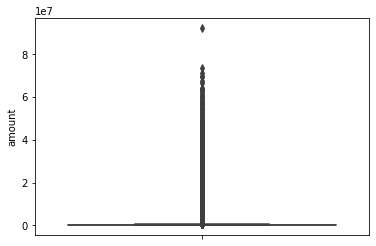

In [86]:
data = df.select("amount", "isFraud").toPandas()
# BoxPlot des transactions avant et après les transactions frauduleuses

data["isFraud"] = data["isFraud"].replace({0: "Non frauduleux", 1: "Frauduleux"})

sns.boxplot(y='amount', data=data, hue='isFraud')
plt.title("Distribution du montant des transactions par type de transaction")
plt.xlabel("Type de transaction")
plt.ylabel("Montant")
plt.show()

### <font color="#0d94cd">Indicateur : Soldes moyens avant et après les fraudes </font>

In [87]:
# Comparaison des soldes avant et après les transactions frauduleuses
transactions_frauduleuses = df.filter(df["isFraud"] == 1)
soldes_avant_frauduleux = transactions_frauduleuses.agg({"oldbalanceOrg": "avg"})
soldes_apres_frauduleux = transactions_frauduleuses.agg({"newbalanceOrig": "avg"})

soldes_avant_frauduleux.show()
soldes_apres_frauduleux.show()


+------------------+
|avg(oldbalanceOrg)|
+------------------+
|1649667.6057116734|
+------------------+

+-------------------+
|avg(newbalanceOrig)|
+-------------------+
| 192392.63183611355|
+-------------------+



### <font color="#0d94cd">Indicateur : Liste des comptes qui ont été vidés </font>

In [ ]:
#Identifier les transactions où newbalanceOrig est inférieur à zéro.

transactions_suspectes = df.filter(df["newbalanceOrig"] == 0)
transactions_suspectes.show()

+----+--------+---------+-----------+-------------+--------------+-----------+--------------+--------------+-------+--------------+
|step|    type|   amount|   nameOrig|oldbalanceOrg|newbalanceOrig|   nameDest|oldbalanceDest|newbalanceDest|isFraud|isFlaggedFraud|
+----+--------+---------+-----------+-------------+--------------+-----------+--------------+--------------+-------+--------------+
|   1|TRANSFER|    181.0|C1305486145|        181.0|           0.0| C553264065|           0.0|           0.0|      1|             0|
|   1|CASH_OUT|    181.0| C840083671|        181.0|           0.0|  C38997010|       21182.0|           0.0|      1|             0|
|   1| PAYMENT|  4024.36|C1265012928|       2671.0|           0.0|M1176932104|           0.0|           0.0|      0|             0|
|   1|   DEBIT|  9644.94|C1900366749|       4465.0|           0.0| C997608398|       10845.0|     157982.12|      0|             0|
|   1| PAYMENT| 11633.76|C1716932897|      10127.0|           0.0| M80156915

### <font color="#0d94cd">Indicateur : Liste des transactions soupçonnées de fraude </font>

In [91]:
# Filter for suspected fraudulent transactions (where isFraud is marked as 1)
suspected_fraud_transactions = df.filter(col("isFlaggedFraud") == 1)

# Display results
print("Liste des transactions soupçonnées de fraude:")
suspected_fraud_transactions.show()

Liste des transactions soupçonnées de fraude:
+----+--------+----------+-----------+-------------+--------------+-----------+--------------+--------------+-------+--------------+
|step|    type|    amount|   nameOrig|oldbalanceOrg|newbalanceOrig|   nameDest|oldbalanceDest|newbalanceDest|isFraud|isFlaggedFraud|
+----+--------+----------+-----------+-------------+--------------+-----------+--------------+--------------+-------+--------------+
| 212|TRANSFER|4953893.08| C728984460|   4953893.08|    4953893.08| C639921569|           0.0|           0.0|      1|             1|
| 250|TRANSFER|1343002.08|C1100582606|   1343002.08|    1343002.08|C1147517658|           0.0|           0.0|      1|             1|
| 279|TRANSFER| 536624.41|C1035541766|    536624.41|     536624.41|C1100697970|           0.0|           0.0|      1|             1|
| 387|TRANSFER|4892193.09| C908544136|   4892193.09|    4892193.09| C891140444|           0.0|           0.0|      1|             1|
| 425|TRANSFER|     1.0

On note que le pourcentage de transaction soupconnées comme étant illégale est très faible dans la base

### <font color="#0d94cd">Indicateur : Pourcentage de fraudes détectées </font>

In [93]:
# Count total fraudulent transactions
total_fraud_count = fraudulent_transactions.count()

# Count flagged fraudulent transactions
flagged_fraud_count = fraudulent_transactions.filter(col("isFlaggedFraud") == 1).count()

# Calculate percentage of flagged frauds
if total_fraud_count > 0:
    percentage_flagged = (flagged_fraud_count / total_fraud_count) * 100
else:
    percentage_flagged = 0

# Display results
print(f"Pourcentage de transactions frauduleuses qui ont été signalées : {percentage_flagged:.2f}%")


Pourcentage de transactions frauduleuses qui ont été signalées : 0.19%


## <font id = '3.4' color="#0d94cd">3.4. Analyse des montants (isFlaggedFraud) </font>

### <font color="#0d94cd"> Indicateur : Montant total de transactions par type (PAYMENT, TRANSFER, etc.) ; </font>

In [25]:
# Calculate total amount per transaction type
transaction_totals = df.groupBy("type").agg(sum("amount").alias("total_amount"))

# Convert to Pandas DataFrame for plotting with Plotly
transaction_totals_pd = transaction_totals.toPandas()

# Create bar chart using Plotly
fig = px.bar(transaction_totals_pd, x="type", y="total_amount",
             title="Total Transaction Amount by Type",
             labels={"type": "Transaction Type", "total_amount": "Total Amount"})

# Show the plot
fig.show()



# <div  id='IV' style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:lightskyblue;overflow:hidden"><b> IV. MODELISATION DE LA FRAUDE </b></div>

## <font id = '4.1' color="#0d94cd">4.1. Préparation des données  </font>

### <font color="#0d94cd"> Sélection des variables </font>

In [26]:
df = df.select("type", "amount", "oldbalanceOrg", "newbalanceOrig","oldbalanceDest", "newbalanceDest", "isFraud")

### <font color="#0d94cd"> Données d'entrainement et données de test</font>

In [27]:
train, test = df.randomSplit([0.7, 0.3], seed=7)

In [28]:
print(f"Train set length: {train.count()} records")
print(f"Test set length: {test.count()} records")

Train set length: 4451877 records
Test set length: 1910743 records


In [29]:
train.dtypes

[('type', 'string'),
 ('amount', 'double'),
 ('oldbalanceOrg', 'double'),
 ('newbalanceOrig', 'double'),
 ('oldbalanceDest', 'double'),
 ('newbalanceDest', 'double'),
 ('isFraud', 'int')]

### <font color="#0d94cd"> Scinder en variables catégorielles et variables numériques pour l'encodage</font>

In [30]:
catCols = [x for (x, dataType) in train.dtypes if dataType == "string"]
numCols = [ x for (x, dataType) in train.dtypes if (dataType == "double") ]

In [31]:
catCols

['type']

### <font color="#0d94cd"> Encodage des variables catégorielles</font>

In [32]:
from pyspark.ml.feature import (
    OneHotEncoder,
    StringIndexer,
)




In [33]:
string_indexer = [
    StringIndexer(inputCol=x, outputCol=x + "_StringIndexer", handleInvalid="skip")
    for x in catCols
]

In [34]:
string_indexe=string_indexer[0].fit(df).transform(df)
string_indexe.show()

+--------+---------+-------------+--------------+--------------+--------------+-------+------------------+
|    type|   amount|oldbalanceOrg|newbalanceOrig|oldbalanceDest|newbalanceDest|isFraud|type_StringIndexer|
+--------+---------+-------------+--------------+--------------+--------------+-------+------------------+
| PAYMENT|  9839.64|     170136.0|     160296.36|           0.0|           0.0|      0|               1.0|
| PAYMENT|  1864.28|      21249.0|      19384.72|           0.0|           0.0|      0|               1.0|
|TRANSFER|    181.0|        181.0|           0.0|           0.0|           0.0|      1|               3.0|
|CASH_OUT|    181.0|        181.0|           0.0|       21182.0|           0.0|      1|               0.0|
| PAYMENT| 11668.14|      41554.0|      29885.86|           0.0|           0.0|      0|               1.0|
| PAYMENT|  7817.71|      53860.0|      46042.29|           0.0|           0.0|      0|               1.0|
| PAYMENT|  7107.77|     183195.0|   

In [35]:
one_hot_encoder = [
    OneHotEncoder(
        inputCols=[f"{x}_StringIndexer" for x in catCols],
        outputCols=[f"{x}_OneHotEncoder" for x in catCols],
    )
]

In [36]:
one_hot_encoder_df=one_hot_encoder[0].fit(string_indexe).transform(string_indexe)
one_hot_encoder_df.show()


+--------+---------+-------------+--------------+--------------+--------------+-------+------------------+------------------+
|    type|   amount|oldbalanceOrg|newbalanceOrig|oldbalanceDest|newbalanceDest|isFraud|type_StringIndexer|type_OneHotEncoder|
+--------+---------+-------------+--------------+--------------+--------------+-------+------------------+------------------+
| PAYMENT|  9839.64|     170136.0|     160296.36|           0.0|           0.0|      0|               1.0|     (4,[1],[1.0])|
| PAYMENT|  1864.28|      21249.0|      19384.72|           0.0|           0.0|      0|               1.0|     (4,[1],[1.0])|
|TRANSFER|    181.0|        181.0|           0.0|           0.0|           0.0|      1|               3.0|     (4,[3],[1.0])|
|CASH_OUT|    181.0|        181.0|           0.0|       21182.0|           0.0|      1|               0.0|     (4,[0],[1.0])|
| PAYMENT| 11668.14|      41554.0|      29885.86|           0.0|           0.0|      0|               1.0|     (4,[1],

### <font color="#0d94cd"> Assembler les variables avant la modélisation</font>

In [37]:
from pyspark.ml.feature import VectorAssembler

In [38]:
assemblerInput = [x for x in numCols]
assemblerInput += [f"{x}_OneHotEncoder" for x in catCols]

In [39]:
assemblerInput

['amount',
 'oldbalanceOrg',
 'newbalanceOrig',
 'oldbalanceDest',
 'newbalanceDest',
 'type_OneHotEncoder']

In [40]:
vector_assembler = VectorAssembler(
    inputCols=assemblerInput, outputCol="VectorAssembler_features"
)

In [41]:
stages = []
stages += string_indexer
stages += one_hot_encoder
stages += [vector_assembler]


In [42]:
#%%time
from pyspark.ml import Pipeline

pipeline = Pipeline().setStages(stages)
model = pipeline.fit(train)

pp_df = model.transform(train)

In [ ]:
pp_df.select(
    "type", "amount", "oldbalanceOrg", "newbalanceOrig", "VectorAssembler_features",
).show(truncate=False)

+-------+------+-------------+--------------+--------------------------------------------------+
|type   |amount|oldbalanceOrg|newbalanceOrig|VectorAssembler_features                          |
+-------+------+-------------+--------------+--------------------------------------------------+
|CASH_IN|1.42  |1270713.41   |1270714.83    |[1.42,1270713.41,1270714.83,0.0,0.0,1.0,0.0]      |
|CASH_IN|4.35  |4136277.22   |4136281.57    |[4.35,4136277.22,4136281.57,0.0,0.0,1.0,0.0]      |
|CASH_IN|4.71  |50198.0      |50202.71      |[4.71,50198.0,50202.71,0.0,0.0,1.0,0.0]           |
|CASH_IN|5.19  |18104.0      |18109.19      |[5.19,18104.0,18109.19,0.0,0.0,1.0,0.0]           |
|CASH_IN|5.66  |5061561.06   |5061566.72    |[5.66,5061561.06,5061566.72,0.0,0.0,1.0,0.0]      |
|CASH_IN|6.5   |1696433.45   |1696439.95    |[6.5,1696433.45,1696439.95,0.0,0.0,1.0,0.0]       |
|CASH_IN|8.29  |20392.0      |20400.29      |[8.29,20392.0,20400.29,0.0,0.0,1.0,0.0]           |
|CASH_IN|9.02  |2416260.59   |

In [43]:
pp_df.show()

+-------+------+-------------+--------------+--------------+--------------+-------+------------------+------------------+------------------------+
|   type|amount|oldbalanceOrg|newbalanceOrig|oldbalanceDest|newbalanceDest|isFraud|type_StringIndexer|type_OneHotEncoder|VectorAssembler_features|
+-------+------+-------------+--------------+--------------+--------------+-------+------------------+------------------+------------------------+
|CASH_IN|  1.42|   1270713.41|    1270714.83|       7644.26|       7642.84|      0|               2.0|     (4,[2],[1.0])|    [1.42,1270713.41,...|
|CASH_IN|  4.35|   4136277.22|    4136281.57|     550806.01|     550801.66|      0|               2.0|     (4,[2],[1.0])|    [4.35,4136277.22,...|
|CASH_IN|  4.71|      50198.0|      50202.71|      75699.61|      75694.89|      0|               2.0|     (4,[2],[1.0])|    [4.71,50198.0,502...|
|CASH_IN|  5.19|      18104.0|      18109.19|    4753751.26|    4753746.06|      0|               2.0|     (4,[2],[1.0

In [44]:

test.count()

1910743

In [49]:
df_test=test.where(test.isFraud == 1)
df_test_total = test

## <font id = '4.2' color="#0d94cd">4.2. Exécution des modèle  </font>

## <font id = '4.2.1' color="#0d94cd">4.2.1. Arbre de décision </font>

In [50]:
from pyspark.ml.classification import DecisionTreeClassifier
import pyspark.sql.functions as F
data = pp_df.select(
    F.col("VectorAssembler_features").alias("features"),
    F.col("isFraud").alias("label"),
)

In [51]:
data.show(5, truncate=False)

+----------------------------------------------------------------+-----+
|features                                                        |label|
+----------------------------------------------------------------+-----+
|[1.42,1270713.41,1270714.83,7644.26,7642.84,0.0,0.0,1.0,0.0]    |0    |
|[4.35,4136277.22,4136281.57,550806.01,550801.66,0.0,0.0,1.0,0.0]|0    |
|[4.71,50198.0,50202.71,75699.61,75694.89,0.0,0.0,1.0,0.0]       |0    |
|[5.19,18104.0,18109.19,4753751.26,4753746.06,0.0,0.0,1.0,0.0]   |0    |
|[5.66,5061561.06,5061566.72,60569.78,60564.12,0.0,0.0,1.0,0.0]  |0    |
+----------------------------------------------------------------+-----+
only showing top 5 rows



In [52]:
train.show(5, truncate=False)

+-------+------+-------------+--------------+--------------+--------------+-------+
|type   |amount|oldbalanceOrg|newbalanceOrig|oldbalanceDest|newbalanceDest|isFraud|
+-------+------+-------------+--------------+--------------+--------------+-------+
|CASH_IN|1.42  |1270713.41   |1270714.83    |7644.26       |7642.84       |0      |
|CASH_IN|4.35  |4136277.22   |4136281.57    |550806.01     |550801.66     |0      |
|CASH_IN|4.71  |50198.0      |50202.71      |75699.61      |75694.89      |0      |
|CASH_IN|5.19  |18104.0      |18109.19      |4753751.26    |4753746.06    |0      |
|CASH_IN|5.66  |5061561.06   |5061566.72    |60569.78      |60564.12      |0      |
+-------+------+-------------+--------------+--------------+--------------+-------+
only showing top 5 rows



In [53]:
pipeline = Pipeline().setStages(stages)
pipe_model = pipeline.fit(df_test_total)
test_df = pipe_model.transform(df_test_total)
test_data = test_df.select(
    F.col("VectorAssembler_features").alias("features"),
    F.col("isFraud").alias("label"),
)

In [54]:
df_test_total.show(5, truncate=False)

+-------+------+-------------+--------------+--------------+--------------+-------+
|type   |amount|oldbalanceOrg|newbalanceOrig|oldbalanceDest|newbalanceDest|isFraud|
+-------+------+-------------+--------------+--------------+--------------+-------+
|CASH_IN|4.58  |94241.0      |94245.58      |0.0           |0.0           |0      |
|CASH_IN|5.44  |0.0          |5.44          |594031.45     |1014777.06    |0      |
|CASH_IN|6.07  |400680.0     |400686.07     |0.0           |0.0           |0      |
|CASH_IN|6.76  |11322.0      |11328.76      |0.0           |0.0           |0      |
|CASH_IN|8.27  |8428410.94   |8428419.21    |258574.41     |258566.14     |0      |
+-------+------+-------------+--------------+--------------+--------------+-------+
only showing top 5 rows



In [55]:
test_data.show(5, truncate=False)

+----------------------------------------------------------------+-----+
|features                                                        |label|
+----------------------------------------------------------------+-----+
|(9,[0,1,2,7],[4.58,94241.0,94245.58,1.0])                       |0    |
|[5.44,0.0,5.44,594031.45,1014777.06,0.0,0.0,1.0,0.0]            |0    |
|(9,[0,1,2,7],[6.07,400680.0,400686.07,1.0])                     |0    |
|(9,[0,1,2,7],[6.76,11322.0,11328.76,1.0])                       |0    |
|[8.27,8428410.94,8428419.21,258574.41,258566.14,0.0,0.0,1.0,0.0]|0    |
+----------------------------------------------------------------+-----+
only showing top 5 rows



In [56]:
from pyspark.ml.classification import DecisionTreeClassifier, LogisticRegression, RandomForestClassifier, NaiveBayes
from pyspark.ml.evaluation import MulticlassClassificationEvaluator


In [57]:
dt_model = DecisionTreeClassifier().fit(data)

## <font id = '4.2.1' color="#0d94cd">4.2.2. Autres modèle : Régression logistique, forêt aléatoire et NaiveBayes </font>

In [58]:

lr_model = LogisticRegression().fit(data)
rf_model = RandomForestClassifier().fit(data)
nb_model = NaiveBayes().fit(data)

In [59]:
 models = {
     "Decision Tree": dt_model,
     "Logistic Regression": lr_model,
     "Random Forest": rf_model,
     "Naive Bayes": nb_model
 }

In [60]:
# Fonction pour calculer les métriques par classe
def classwise_metrics(predictions):
    # Obtenir les étiquettes distinctes dans le jeu de données
    labels = [float(row['label']) for row in predictions.select('label').distinct().collect()]

    class_metrics = {}

    for label in labels:
        # Filtrer les prédictions pour chaque classe
        class_predictions = predictions.filter(predictions.label == label)

        # Évaluer la précision, la précision pondérée, le rappel pondéré et le score F1 pour la classe
        evaluator_accuracy = MulticlassClassificationEvaluator(metricName="accuracy", labelCol="label", predictionCol="prediction", metricLabel=label)
        evaluator_precision = MulticlassClassificationEvaluator(metricName="weightedPrecision", labelCol="label", predictionCol="prediction", metricLabel=label)
        evaluator_recall = MulticlassClassificationEvaluator(metricName="weightedRecall", labelCol="label", predictionCol="prediction", metricLabel=label)
        evaluator_f1 = MulticlassClassificationEvaluator(metricName="f1", labelCol="label", predictionCol="prediction", metricLabel=label)

        accuracy = evaluator_accuracy.evaluate(class_predictions)
        precision = evaluator_precision.evaluate(class_predictions)
        recall = evaluator_recall.evaluate(class_predictions)
        f1_score = evaluator_f1.evaluate(class_predictions)

        class_metrics[str(label)] = {
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1-score": f1_score
        }
    return class_metrics

# Boucle à travers chaque modèle, calculer les métriques par classe et les afficher
for model_name, model in models.items():
    print(f"Modèle: {model_name}")

    # Faire des prédictions
    predictions = model.transform(test_data)

    # Calculer les métriques par classe
    class_metrics = classwise_metrics(predictions)

    # Afficher les métriques par classe
    for class_label, metrics in class_metrics.items():
        print(f"Classe {class_label}:")
        for metric, value in metrics.items():
            print(f"{metric}: {value}")
        print()
    print()

Modèle: Decision Tree
Classe 1.0:
Accuracy: 0.7201119552179128
Precision: 1.0
Recall: 0.7201119552179128
F1-score: 0.8372849837284984

Classe 0.0:
Accuracy: 0.9999208695752425
Precision: 1.0
Recall: 0.9999208695752425
F1-score: 0.9999604332221533


Modèle: Logistic Regression
Classe 1.0:
Accuracy: 0.4674130347860856
Precision: 1.0
Recall: 0.4674130347860856
F1-score: 0.6370572207084468

Classe 0.0:
Accuracy: 0.9999255859581752
Precision: 1.0
Recall: 0.9999255859581752
F1-score: 0.9999627915946737


Modèle: Random Forest
Classe 1.0:
Accuracy: 0.3950419832067173
Precision: 1.0
Recall: 0.3950419832067173
F1-score: 0.5663513900831183

Classe 0.0:
Accuracy: 0.9999984278723558
Precision: 1.0
Recall: 0.9999984278723558
F1-score: 0.9999992139355599


Modèle: Naive Bayes
Classe 1.0:
Accuracy: 0.8668532586965214
Precision: 1.0
Recall: 0.8668532586965214
F1-score: 0.9286785178839152

Classe 0.0:
Accuracy: 0.6230672000721083
Precision: 1.0
Recall: 0.6230672000721083
F1-score: 0.767765130173818




In [64]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Définir les modèles
models = {
    "Decision Tree": dt_model,
    "Logistic Regression": lr_model,
    "Random Forest": rf_model,
    "Naive Bayes": nb_model
}

# Fonction pour calculer l'AUC
def compute_auc(predictions):
    evaluator = BinaryClassificationEvaluator(metricName="areaUnderROC")
    auc = evaluator.evaluate(predictions)
    return auc

# Boucle à travers chaque modèle, calculer l'AUC et l'afficher
for model_name, model in models.items():
    print(f"Modèle: {model_name}")

    # Faire des prédictions
    predictions = model.transform(test_data)

    # Calculer l'AUC
    auc = compute_auc(predictions)

    # Afficher l'AUC
    print(f"AUC: {auc}")
    print()

Modèle: Decision Tree
AUC: 0.5917392100973032

Modèle: Logistic Regression
AUC: 0.992576551870362

Modèle: Random Forest
AUC: 0.9811884781775112

Modèle: Naive Bayes
AUC: 0.44444549652231224



In [63]:
for model_name, model in models.items():
    print(f"Modèle: {model_name}")

    # Faire des prédictions
    predictions = model.transform(test_data)

    # Calculer l'AUC pour chaque classe
    auc_per_class = compute_auc_per_class(predictions)

    # Afficher l'AUC pour chaque classe
    print(f"AUC pour chaque classe: {auc_per_class}")
    print()

Modèle: Decision Tree


NameError: name 'compute_auc_per_class' is not defined

In [ ]:
from sklearn.metrics import classification_report

# Définir les modèles
models = {
    "Decision Tree": dt_model,
    "Logistic Regression": lr_model,
    "Random Forest": rf_model,
    "Naive Bayes": nb_model
}

# Fonction pour calculer les métriques par classe
def classwise_metrics(y_true, y_pred):
    report = classification_report(y_true, y_pred, output_dict=True)
    return report

# Calculer et afficher les métriques par classe pour chaque modèle
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    class_metrics = classwise_metrics(y_test, y_pred)
    print(f"{model_name}:")
    print(classification_report(y_test, y_pred))
    print()

In [ ]:
dt_model = DecisionTreeClassifier().fit(data)

In [ ]:
# Faire des prédictions sur les données de test
predictions = dt_model.transform(test_data)

# Évaluer le modèle
evaluator_accuracy = MulticlassClassificationEvaluator(metricName="accuracy")
evaluator_precision = MulticlassClassificationEvaluator(metricName="weightedPrecision")
evaluator_recall = MulticlassClassificationEvaluator(metricName="weightedRecall")
evaluator_f1 = MulticlassClassificationEvaluator(metricName="f1")

accuracy = evaluator_accuracy.evaluate(predictions)
precision = evaluator_precision.evaluate(predictions)
recall = evaluator_recall.evaluate(predictions)
f1_score = evaluator_f1.evaluate(predictions)

print("Précision:", accuracy)
print("Précision pondérée:", precision)
print("Rappel pondéré:", recall)
print("Score F1:", f1_score)

In [ ]:
lr_model = LogisticRegression().fit(data)

In [ ]:
# Faire des prédictions sur les données de test
predictions = lr_model.transform(test_data)

# Évaluer le modèle
evaluator_accuracy = MulticlassClassificationEvaluator(metricName="accuracy")
evaluator_precision = MulticlassClassificationEvaluator(metricName="weightedPrecision")
evaluator_recall = MulticlassClassificationEvaluator(metricName="weightedRecall")
evaluator_f1 = MulticlassClassificationEvaluator(metricName="f1")

accuracy = evaluator_accuracy.evaluate(predictions)
precision = evaluator_precision.evaluate(predictions)
recall = evaluator_recall.evaluate(predictions)
f1_score = evaluator_f1.evaluate(predictions)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)

In [ ]:
# Définir le modèle Naive Bayes
nb_model = NaiveBayes().fit(data)

# Faire des prédictions sur les données de test
predictions = nb_model.transform(test_data)

# Évaluer le modèle
evaluator_accuracy = MulticlassClassificationEvaluator(metricName="accuracy")
evaluator_precision = MulticlassClassificationEvaluator(metricName="weightedPrecision")
evaluator_recall = MulticlassClassificationEvaluator(metricName="weightedRecall")
evaluator_f1 = MulticlassClassificationEvaluator(metricName="f1")

accuracy = evaluator_accuracy.evaluate(predictions)
precision = evaluator_precision.evaluate(predictions)
recall = evaluator_recall.evaluate(predictions)
f1_score = evaluator_f1.evaluate(predictions)

print("Précision:", accuracy)
print("Précision pondérée:", precision)
print("Rappel pondéré:", recall)
print("Score F1:", f1_score)

FORET ALEATOIRE

In [ ]:
from pyspark.ml.classification import RandomForestClassifier

In [ ]:
rf_model = RandomForestClassifier().fit(data)

In [ ]:
 Faire des prédictions sur les données de test

predictions = rf_model.transform(test_data)

# Evaluation  du modèle
evaluator_accuracy = MulticlassClassificationEvaluator(metricName="accuracy")
evaluator_precision = MulticlassClassificationEvaluator(metricName="weightedPrecision")
evaluator_recall = MulticlassClassificationEvaluator(metricName="weightedRecall")
evaluator_f1 = MulticlassClassificationEvaluator(metricName="f1")

accuracy = evaluator_accuracy.evaluate(predictions)
precision = evaluator_precision.evaluate(predictions)
recall = evaluator_recall.evaluate(predictions)
f1_score = evaluator_f1.evaluate(predictions)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)